<a href="https://colab.research.google.com/github/Gabriellemga/Python_Data_Science_Alura/blob/main/Pandas_limpeza%20_tratamento_dados/Desafio_limpando_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1- Desafio: utilizando parâmetros do json_normalize

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_json('/content/sample_data/informacoes.json')
df.head()

,nome,idade,enderecos
0,João,28,"{'tipo': 'casa', 'rua': 'Rua A', 'numero': 123..."
1,João,28,"{'tipo': 'trabalho', 'rua': 'Rua B', 'numero':..."


In [ ]:
import json

In [ ]:
with open('/content/sample_data/informacoes.json') as f:
  dados = json.load(f)

In [ ]:
df_normalizados = pd.json_normalize(dados, record_path = 'enderecos' , meta = ['nome','idade'])
df_normalizados

,tipo,rua,numero,cidade,nome,idade
0,casa,Rua A,123,São Paulo,João,28
1,trabalho,Rua B,456,Rio de Janeiro,João,28


## 2-Desafio: tratando os dados

In [ ]:
import pandas as pd
import json

In [ ]:
df = pd.read_json('/content/sample_data/dados.json')
df.head()

,pessoas
0,"{'nome': 'João', 'idade': '25', 'endereco': {'..."
1,"{'nome': 'Maria', 'idade': 30, 'endereco': {'r..."


In [ ]:
with open('/content/sample_data/dados.json') as f:
  dados = json.load(f)

In [ ]:
df_normalizados = pd.json_normalize(dados, record_path= 'pessoas')
df_normalizados

,nome,idade,telefones,endereco.rua,endereco.numero,endereco.cidade
0,João,25,"[11 1111-1111, 11 2222-2222]",Rua A,123,São Paulo
1,Maria,30,[21 3333-3333],,456,Rio de Janeiro


In [ ]:
df_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   nome             2 non-null      object
 1   idade            2 non-null      object
 2   telefones        2 non-null      object
 3   endereco.rua     2 non-null      object
 4   endereco.numero  2 non-null      int64 
 5   endereco.cidade  2 non-null      object
dtypes: int64(1), object(5)
memory usage: 228.0+ bytes


In [ ]:
df_normalizados['idade'] = df_normalizados['idade'].astype(int)

In [ ]:
df_filtrado = df_normalizados.query('`endereco.rua` != ""')

In [ ]:
df_normalizados = df_normalizados[df_normalizados['endereco.rua'] != '' ]

In [ ]:
df_normalizados

,nome,idade,telefones,endereco.rua,endereco.numero,endereco.cidade
0,João,25,"[11 1111-1111, 11 2222-2222]",Rua A,123,São Paulo


## 3-Desafio: tratando uma base de dados

In [ ]:
import pandas as pd
import numpy as np
import json

In [ ]:
with open('/content/sample_data/cursos_cadastrados.json') as f:
  df = json.load(f)

In [ ]:
dados = pd.json_normalize(df)
dados

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
0,Introdução à programação,Programação,20 horas,100,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.90,João Silva,joao.silva@emailaleatorio.com,(11) 9999-9999
1,Excel para iniciantes,Produtividade,None,None,None,None,None,None,Maria Oliveira,maria.oliveira@emailaleatorio.com,(11) 8888-8888
2,Marketing digital para negócios,Marketing,30 horas,75,2022-03-01,2022-03-31,Curso introdutório em marketing,89.9,Ana Santos,ana.santos@emailaleatorio.com,(11) 7777-7777
3,Inteligência artificial,Programação,40 horas,,2022-04-01,,Curso avançado sobre inteligência artificial c...,129.9,,contato@emailaleatorio.com,
4,Inglês para negócios,Idiomas,20 horas,30,,,Curso de inglês para negócios,69.9,John Smith,,
5,Introdução à programação,Programação,20 horas,100,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.90,João Silva,joao.silva@emailaleatorio.com,(11) 9999-9999


In [ ]:
dados.replace('',np.nan, inplace = True)

<ipython-input-149-e25e4b2abd87>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados.replace('',np.nan, inplace = True)


In [ ]:
dados.isna().sum()

,0
curso,0
categoria,0
carga_horaria,1
concluintes,2
data_inicio,2
data_conclusao,3
descricao,1
preco,1
instrutor.nome,1
instrutor.email,1


In [ ]:
dados[dados.isna().any(axis = 1)]

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
1,Excel para iniciantes,Produtividade,None,NaN,None,None,None,None,Maria Oliveira,maria.oliveira@emailaleatorio.com,(11) 8888-8888
3,Inteligência artificial,Programação,40 horas,NaN,2022-04-01,NaN,Curso avançado sobre inteligência artificial c...,129.9,NaN,contato@emailaleatorio.com,NaN
4,Inglês para negócios,Idiomas,20 horas,30.0,NaN,NaN,Curso de inglês para negócios,69.9,John Smith,NaN,NaN


In [ ]:
dados.dropna(inplace = True)

In [ ]:
dados.duplicated()

,0
0,False
2,False
5,True


In [ ]:
dados.drop_duplicates(inplace=True)

In [ ]:
dados_tratados = dados.copy()

In [ ]:
dados_tratados

,curso,categoria,carga_horaria,concluintes,data_inicio,data_conclusao,descricao,preco,instrutor.nome,instrutor.email,instrutor.telefone
0,Introdução à programação,Programação,20 horas,100.0,2022-01-01,2022-01-20,Curso introdutório à programação com Python,99.90,João Silva,joao.silva@emailaleatorio.com,(11) 9999-9999
2,Marketing digital para negócios,Marketing,30 horas,75.0,2022-03-01,2022-03-31,Curso introdutório em marketing,89.9,Ana Santos,ana.santos@emailaleatorio.com,(11) 7777-7777


In [ ]:
dados_tratados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 0 to 2
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   curso               2 non-null      object 
 1   categoria           2 non-null      object 
 2   carga_horaria       2 non-null      object 
 3   concluintes         2 non-null      float64
 4   data_inicio         2 non-null      object 
 5   data_conclusao      2 non-null      object 
 6   descricao           2 non-null      object 
 7   preco               2 non-null      object 
 8   instrutor.nome      2 non-null      object 
 9   instrutor.email     2 non-null      object 
 10  instrutor.telefone  2 non-null      object 
dtypes: float64(1), object(10)
memory usage: 300.0+ bytes


In [ ]:
dados_tratados['concluintes'] = dados_tratados['concluintes'].astype(int)

In [ ]:
dados_tratados['data_inicio'] = pd.to_datetime(dados_tratados['data_inicio'])

In [ ]:
dados_tratados['data_conclusao'] = pd.to_datetime(dados_tratados['data_conclusao'])

In [ ]:
dados_tratados['preco'] = dados_tratados['preco'].astype(float)

In [ ]:
dados_tratados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 0 to 2
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   curso               2 non-null      object        
 1   categoria           2 non-null      object        
 2   carga_horaria       2 non-null      object        
 3   concluintes         2 non-null      int64         
 4   data_inicio         2 non-null      datetime64[ns]
 5   data_conclusao      2 non-null      datetime64[ns]
 6   descricao           2 non-null      object        
 7   preco               2 non-null      float64       
 8   instrutor.nome      2 non-null      object        
 9   instrutor.email     2 non-null      object        
 10  instrutor.telefone  2 non-null      object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(7)
memory usage: 300.0+ bytes


## 4-Desafio: identificando fraudes

In [ ]:
import pandas as pd

# criando um DataFrame com 30 transações aleatórias
df = pd.DataFrame({
    'ID da transação': range(1, 31),
    'Valor da transação': [100, 200, 150, 500, 300, 913, 250, 400, 200, 150,
                           200, 200, 400, 300, 150, 301, 805, 300, 400, 250,
                           150, 100, 500, 600, 200, 350, 100, 250, 800, 250],
    'Data da transação': pd.date_range(start='2022-01-01', end='2022-01-30', freq='D'),
    'Local da transação': ['São Paulo, Brasil', 'Rio de Janeiro, Brasil', 'Belo Horizonte, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'Nova Iorque, EUA', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'Rio de Janeiro, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'Los Angeles, EUA', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil', 'São Paulo, Brasil',
                           'São Paulo, Brasil', 'São Paulo, Brasil', 'Miami, EUA', 'São Paulo, Brasil']
})

In [ ]:
import seaborn as sns

<Axes: xlabel='Valor da transação'>

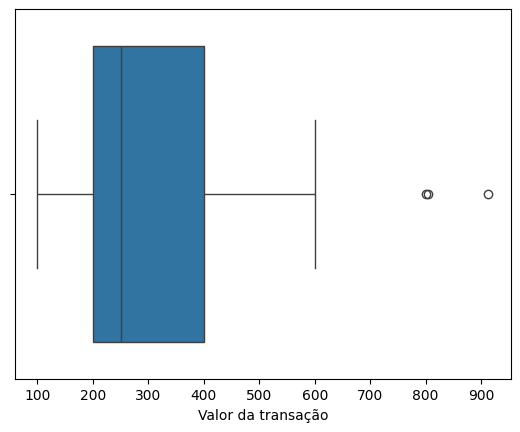

In [ ]:
sns.boxplot(x=df['Valor da transação'])

In [ ]:
Q1 = df['Valor da transação'].quantile(.25)
Q3 = df['Valor da transação'].quantile(.75)
IQR = Q3-Q1
limite_inferior = Q1 - 1.5*IQR
limite_superior = Q3 + 1.5*IQR

In [ ]:
outliers = df[(df['Valor da transação'] < limite_inferior) | (df['Valor da transação'] > limite_superior)]
outliers

,ID da transação,Valor da transação,Data da transação,Local da transação
5,6,913,2022-01-06,"Nova Iorque, EUA"
16,17,805,2022-01-17,"Los Angeles, EUA"
28,29,800,2022-01-29,"Miami, EUA"
